In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations
from copy import deepcopy

pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('expand_frame_repr', False)

dataset = pd.read_csv('dataset.csv')

print(dataset.shape)
print(dataset.columns)
print(dataset.head)

(210, 8)
Index(['area', 'perimeter', 'compactness', 'kernel_length', 'kernel_width',
       'asymmetry_coefficient', 'groove_length', 'variety'],
      dtype='object')
<bound method NDFrame.head of       area  perimeter  compactness  kernel_length  kernel_width  asymmetry_coefficient  groove_length  variety
0    15.26      14.84       0.8710          5.763         3.312                  2.221          5.220        1
1    14.88      14.57       0.8811          5.554         3.333                  1.018          4.956        1
2    14.29      14.09       0.9050          5.291         3.337                  2.699          4.825        1
3    13.84      13.94       0.8955          5.324         3.379                  2.259          4.805        1
4    16.14      14.99       0.9034          5.658         3.562                  1.355          5.175        1
5    14.38      14.21       0.8951          5.386         3.312                  2.462          4.956        1
6    14.69      14.49    

In [12]:
#Create 3 DataFrame for each Species
cluster = []
for i in range(3):
    cluster += [dataset[dataset['variety']==(i+1)]]
    print(cluster[i].describe())

            area  perimeter  compactness  kernel_length  kernel_width  asymmetry_coefficient  groove_length  variety
count  70.000000  70.000000    70.000000      70.000000     70.000000              70.000000      70.000000     70.0
mean   14.334429  14.294286     0.880070       5.508057      3.244629               2.667403       5.087214      1.0
std     1.215704   0.576583     0.016191       0.231508      0.177616               1.173901       0.263699      0.0
min    11.230000  12.630000     0.839200       4.902000      2.850000               0.765100       4.519000      1.0
25%    13.750000  13.960000     0.868850       5.384500      3.134250               1.826500       4.924500      1.0
50%    14.355000  14.320000     0.880500       5.534000      3.243500               2.545500       5.094000      1.0
75%    15.045000  14.732500     0.890400       5.677000      3.378500               3.301000       5.223500      1.0
max    17.080000  15.460000     0.918300       6.053000      3.6

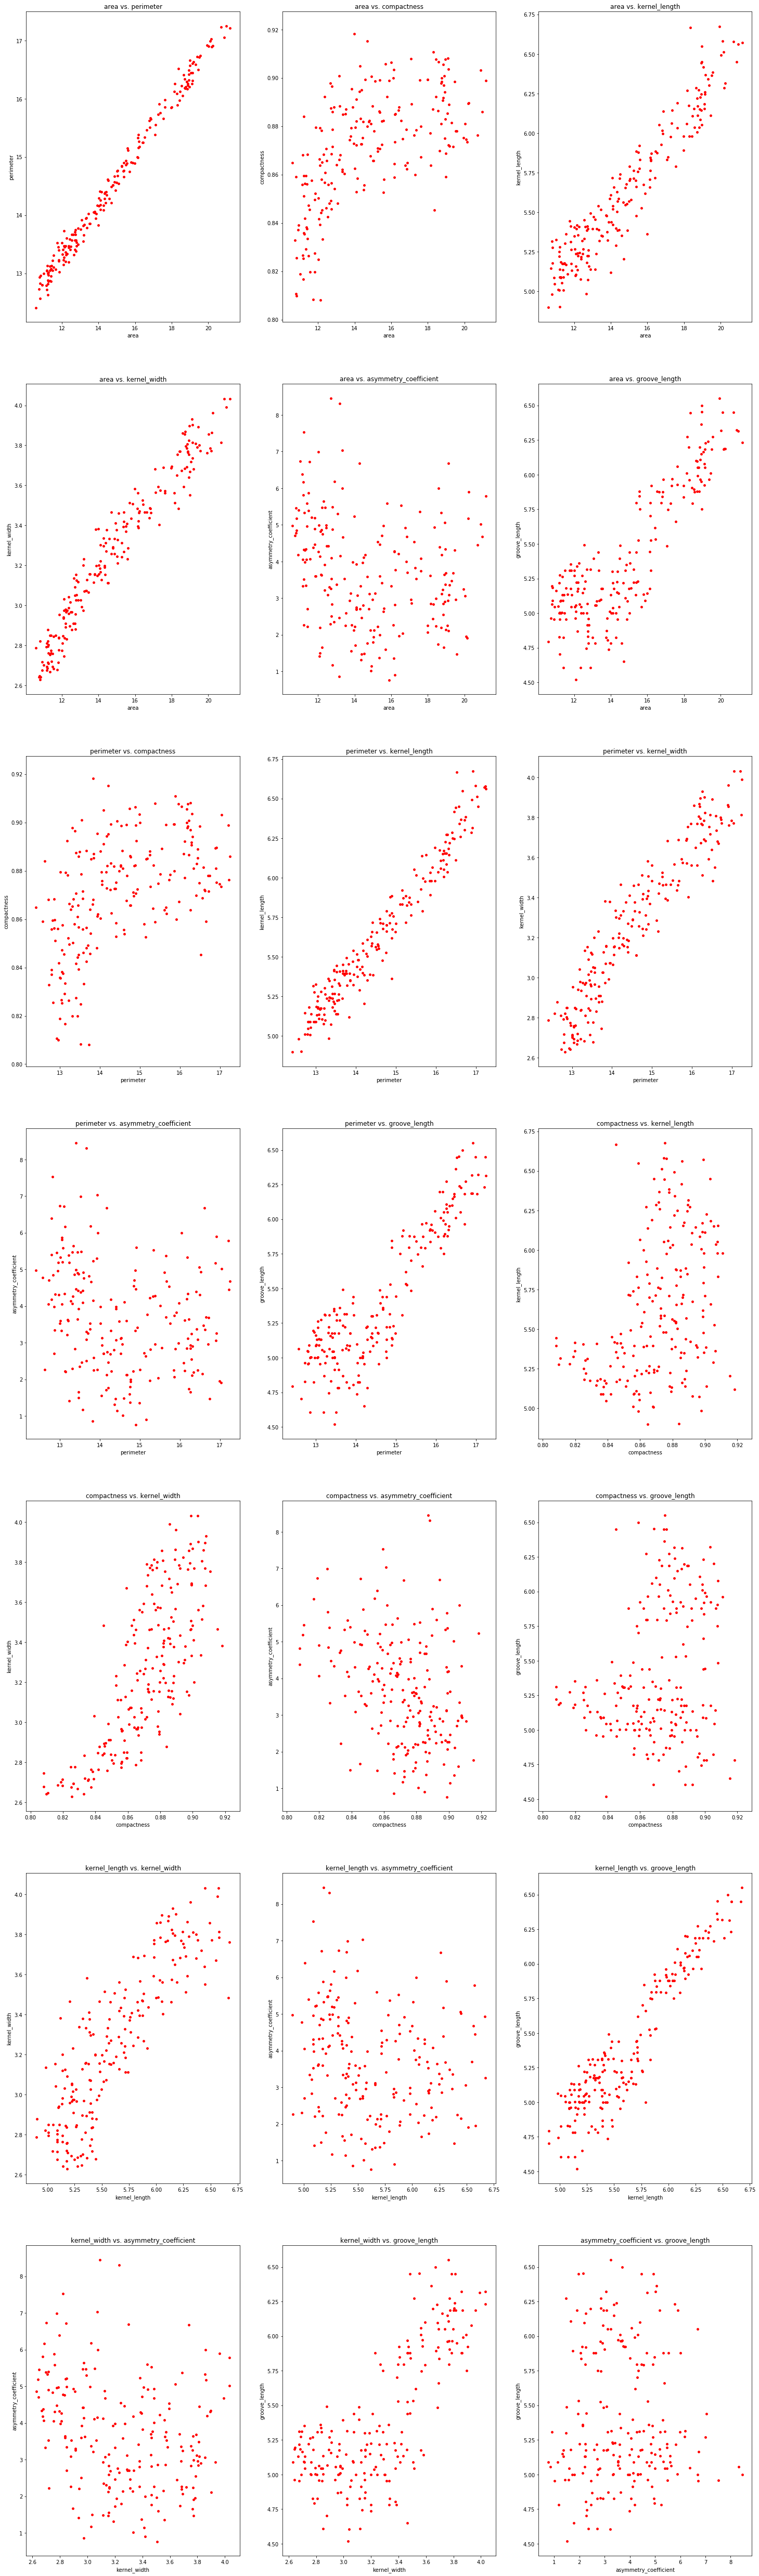

In [17]:
# Plot each 2 attribute, with no cluster
plt.figure()
fig,ax=plt.subplots(7,3,figsize=(25, 90))
count = 0
for column in combinations(dataset.columns[:7], 2):
    idj = count%3
    idi = count//3
    ax[idi][idj].scatter(dataset[column[0]].values, dataset[column[1]].values, c='r', s=15)
    ax[idi][idj].set(title=column[0]+' vs. '+column[1], xlabel=column[0], ylabel=column[1])
    count += 1
    

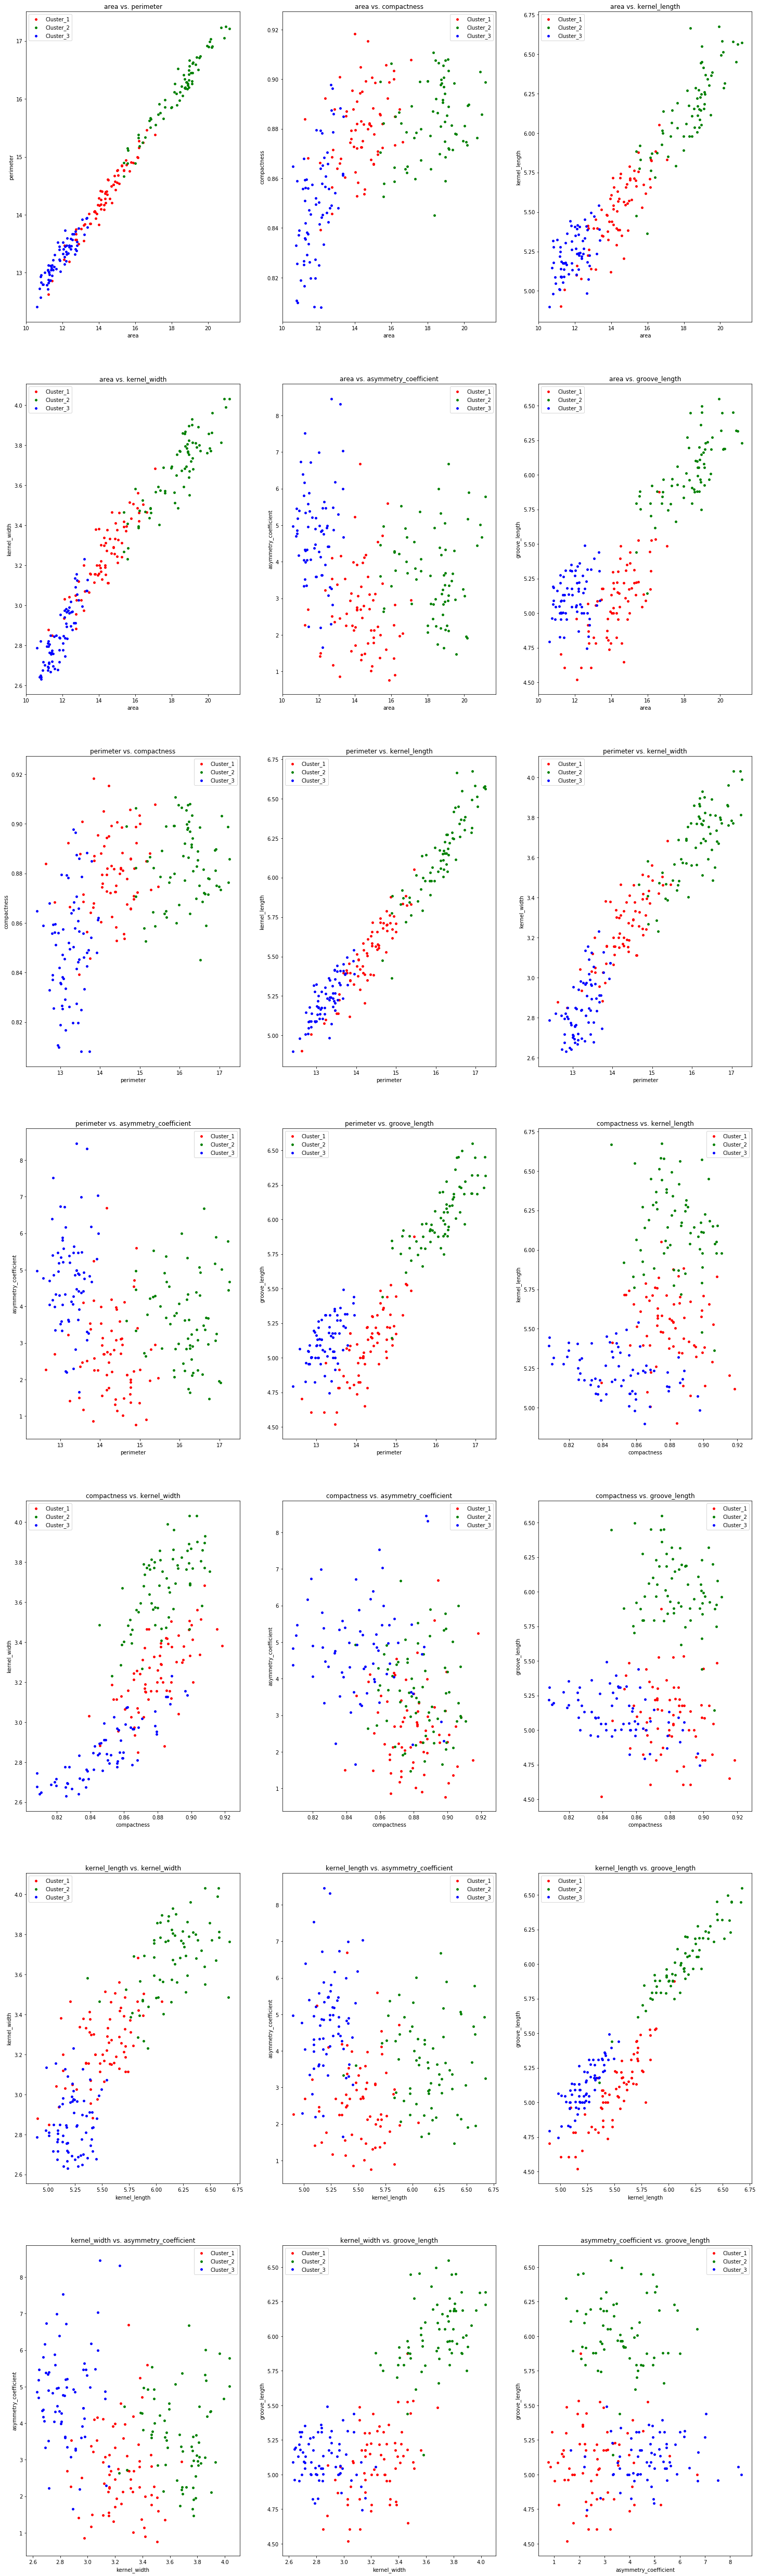

In [18]:
# Plot each 2 attribute, with cluster
plt.figure()
fig,ax=plt.subplots(7,3,figsize=(25, 90))
count = 0
color = ['r', 'g', 'b']
for column in combinations(dataset.columns[:7], 2):
    idj = count%3
    idi = count//3
    for i in range(3):
        ax[idi][idj].scatter(cluster[i][column[0]].values, cluster[i][column[1]].values,
                             c=color[i], label='Cluster_'+str(i+1), s=15)
    ax[idi][idj].set(title=column[0]+' vs. '+column[1], xlabel=column[0], ylabel=column[1])
    ax[idi][idj].legend()
    count += 1


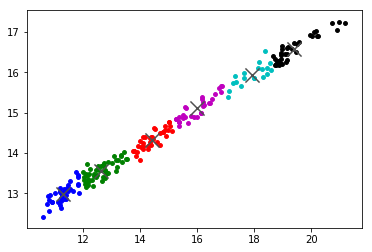

98.81558359600604

In [34]:
import random
from itertools import combinations
from copy import deepcopy

class KMeans(object):
    def __init__(self, dataset, k = 2, keycols = [], epsilon = 0.0001):
        self.dataset = dataset
        self.k = k
        self.keycols = keycols
        self.epsilon = epsilon

    def run(self):
        self.data = self.__generate_data()
        self.centroids = self.__generate_centroids()

        centroids_temp = np.zeros(self.centroids.shape)

        self.clusters = np.zeros(len(self.data))

        error = self.__distance(self.centroids, centroids_temp, None)

        while error >= self.epsilon:
            for idx in range(len(self.data)):
                dist = self.__distance(self.data[idx], self.centroids)
                cluster = np.argmin(dist)
                self.clusters[idx] = cluster

            centroids_temp = deepcopy(self.centroids)
            for idx in range(self.k):
                points = [self.data[jdx] for jdx in range(len(self.data)) if self.clusters[jdx] == idx]
                if not points:
                    ranidx = random.randint(0, len(self.data)-1)
                    points = [self.data[ranidx]]
                    self.clusters[ranidx] = idx
                self.centroids[idx] = np.mean(points, axis=0)
            error = self.__distance(self.centroids, centroids_temp, None)

    def show_clusters(self):
        print(self.clusters)

    def plot(self):
        colors = ['r', 'g', 'b', 'c', 'm', 'k']
        fig, ax = plt.subplots()
        for idx in range(self.k):
            p = np.array([self.data[jdx] for jdx in range(len(self.data)) if self.clusters[jdx] == idx])
            ax.scatter(p[:, 0], p[:, 1], s=15, c=colors[idx])
        ax.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=200, c="#505050")
        plt.show()
        
    def sse(self, k = 0):
        if not k:
            k = self.k
        sum = 0
        for c in range(self.k):
            points = [self.data[j] for j in range(len(self.data)) if self.clusters[j] == c]
            for p in points:
                #print(p)
                #print(self.centroids[c])
                sum += self.__distance(p, self.centroids[c], None)
                #print(a)
        return sum
            

    def __distance(self, p1, p2, axis = 1):
        return np.linalg.norm(p1-p2, axis=axis)

    def __generate_data(self):
        x = self.dataset[self.keycols[0]].values
        y = self.dataset[self.keycols[1]].values

        return np.array(list(zip(x, y)), dtype=np.float32)

    def __generate_centroids(self):
        centroids_x = np.random.randint(np.min(self.data[:, 0])-self.epsilon-1,
                                        np.max(self.data[:, 0])+self.epsilon+1,
                                        size = self.k
        )
        centroids_y = np.random.randint(np.min(self.data[:, 1])-self.epsilon-1,
                                        np.max(self.data[:, 1])+self.epsilon+1,
                                        size = self.k
        )

        return np.array(list(zip(centroids_x, centroids_y)), dtype=np.float32)

    def set_k(self, k):
        self.k = k

    def get_k(self):
        return self.k

    def set_keycols(self, keycols):
        self.keycols = keycols

    def get_keycols(self):
        return self.keycols

a = KMeans(dataset, 6, ['area', 'perimeter'])
a.run()
#a.show_clusters()
a.plot()
a.sse(3)
